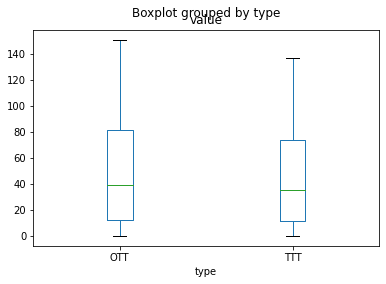

In [4]:
import pandas as pd
TWOTAILED = 'TTT'
ONETAILED = 'OTT'

ALPHA05 = 0.05   
ALPHA01 = 0.05   

dfw = pd.read_csv("./WSRTdf.csv")
boxplot = dfw.boxplot(by='type', column='value', grid = False)


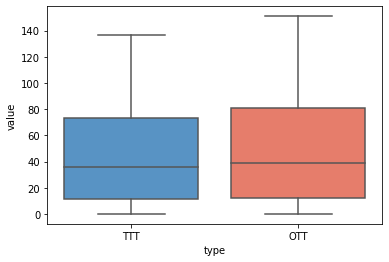

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfw = pd.read_csv("./WSRTdf.csv")
myfmcolor = sns.color_palette(['#4695d6','#fa6e57','#7ebc59','#fed95c'])
sns.set_palette(myfmcolor)
sns.boxplot(y='value', x='type', data=dfw)
plt.show()

In [10]:
import pandas as pd

df = pd.read_csv("./students.csv")
df

,student,mathematics,science
0,1,20,21
1,2,13,13
2,3,30,36
3,4,14,19
4,5,16,20
5,6,12,15
6,7,25,23
7,8,29,27
8,9,17,14
9,10,26,29


In [28]:
import pandas as pd

df = pd.read_csv("./students.csv")
df.corr(method ='spearman')




,student,mathematics,science
student,1.000000,0.260606,0.187879
mathematics,0.260606,1.000000,0.890909
science,0.187879,0.890909,1.000000


[2, 18, 45, 49, 58, 60, 62, 67, 70]


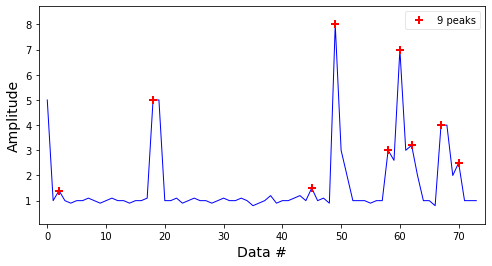

In [95]:
import matplotlib.pyplot as plt

x=[5,1,1.4,1,0.9,1,1,1.1,1,0.9,1,1.1,1,1,0.9,1,1,1.1,5,5,1,1,1.1,0.9,1,1.1,1,1,0.9,1,1.1,1,1,1.1,1,0.8,0.9,1,1.2,0.9,1,1,1.1,1.2,1,1.5,1,1.1,0.9,8,3,2,1,1,1,0.9,1,1,3,2.6,7,3,3.2,2,1,1,0.8,4,4,2,2.5,1,1,1]
mph = 1.2
mingap = 0.2

nelem = len(x)
ndiff = nelem-1
diff = []
for i in range(0, ndiff):
    diff.append(float(x[i+1] - x[i]))
#print(x)
#print(diff)
rising = diff[:]
rising.insert(0,0)
decreasing = diff[:]
decreasing.append(0)

peaks = []
for i in range(0, nelem):
    if(rising[i] > 0 and decreasing[i] <= 0):   # = to keep first of a plateau
        peaks.append(i)
#print(peaks, len(peaks))
#peaks higher than minimumpeakheight mph
for p in reversed(peaks):
    if x[p] < mph:
        peaks.remove(p)
#print(peaks)
npeaks = len(peaks)
#print(peaks, len(peaks))

#peaks higher than surrounding gap
for i in range(npeaks-1,-1,-1):
    if not(abs(x[peaks[i]] - x[peaks[i]-1]) > mingap and abs(x[peaks[i]] - x[peaks[i]+1]) > mingap):
        # to keep first of a plateau
        if not (abs(x[peaks[i]] - x[peaks[i]-1]) > mingap and x[peaks[i]] == x[peaks[i]+1]):
            peaks.remove(peaks[i])

print(peaks)
npeaks = len(peaks)

#plot
_, ax = plt.subplots(1, 1, figsize=(8, 4))
no_ax = True
#plot values
ax.plot(x, 'b', lw=1)
label = 'peak'
label = label + 's' if npeaks > 1 else label
#plot peaks
ax.plot(peaks, [x[i] for i in peaks], '+', mfc=None, mec='r', mew=2, ms=8,label='%d %s' % (npeaks, label))
ax.legend(loc='best', framealpha=.5, numpoints=1)
ax.set_xlim(-.02*nelem, nelem*1.02-1)
ymin, ymax = min(x), max(x)
yrange = ymax - ymin if ymax > ymin else 1
ax.set_ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
ax.set_xlabel('Data #', fontsize=14)
ax.set_ylabel('Amplitude', fontsize=14)
plt.show()